In [18]:
#Packages

using Roots, Dates, Distributions

In [22]:
#black 76

Valuation_date = Date(2026,01,23)
Expiry_date = Date(2026,12,15)

# ACT

actual_days = Dates.value(Expiry_date - Valuation_date)
T = actual_days / 365


println("Time to expiry (Act): ", round(T, digits = 5), " years")
r = 0.01933
Discount_factor = exp(-T*r)

println("Discount factor = ", (r*100), "%")


Time to expiry (Act): 0.89315 years
Discount factor = 1.933%


In [73]:
#Task 1, option price for 0.3 volatility


#user input
σ = 0.3
F0 = 88.4
K = 65
N = Normal(0,1)

#Defining a function

function Put_B76(σ, F0, K, T, r)

    d1 = (log(F0/K) + (1/2*σ^2*T))/(σ*sqrt(T))
    d2 = d1 - σ * sqrt(T)


    N = Normal(0,1)


    price = Discount_factor * (K *cdf(N, -d2) - F0 * cdf(N, -d1) )   

    return price
end

println("The option price at σ = 0.3 is: ")
print(Put_B76(σ, F0, K, T, r))


The option price at σ = 0.3 is: 
1.4846394074830713

In [34]:
println("Testing at different levels of σ:")

vols = 0.1:0.1:0.5  # Testing from 10% to 50% vol

for n in vols
    put = Put_B76(n, F0, K, T, r)
    println("Price at volatility ", n, " is ", put)
end

Testing at different levels of σ:
Price at volatility 0.1 is 0.001066859658084619
Price at volatility 0.2 is 0.3061676864075049
Price at volatility 0.3 is 1.4846394074830713
Price at volatility 0.4 is 3.2716047579937113
Price at volatility 0.5 is 5.380120647233912


In [35]:
#Task nr. 2, finding the IV


strikes = [65,70,75,80,85 ]
premiums = [1.55, 2.19, 3.08, 4.43, 6.21]

println("The implied volatilites at different strikes are:")
for (k,P_target) in zip(strikes, premiums)
    Objective(σ) = Put_B76(σ, F0, k, T, r) - P_target
    iv = find_zero(Objective, (0.001, 2.0))

    println("Strike: $k | IV: $(round(iv * 100, digits=2))%")
end


The implied volatilites at different strikes are:
Strike: 65 | IV: 30.42%
Strike: 70 | IV: 28.39%
Strike: 75 | IV: 26.55%
Strike: 80 | IV: 25.33%
Strike: 85 | IV: 24.23%


In [ ]:


function bicection(f,a,b)
    
    maxiter = 1000
    tol = 1e-9
    fa = f(a)
    fb = f(b)

    #initial check

    if fa*fb > 0 
        println("There is no root in the selected area")
    end



    for i in 1:maxiter
        m = (a+b)/2
        fm = f(m)

        if abs(b - a) < tol || abs(fm) < 1e-12
            return m, i
        end
        
        if fa * fm < 0 
            b = m
            fb = fm

        else
            a = m
            fa = fm
        end
    end
    return (a+b)/2, maxiter
end

bicection (generic function with 1 method)

In [47]:
#Try running with our options

iv_results = []
for (k, mkt_cap) in zip(strikes, premiums)
    obj(σ) = Put_B76(σ, F0, k, T, r) - mkt_cap
    try
        
        iv, iter = bicection(obj, 1e-6, 5.0)
        println("Strike $k | IV : $iv | Iternations : $iter ")
        push!(iv_results, iv)
    catch e
        println("Strike: $k  No solution: Arbitrage violation")
        push!(iv_results, NaN)
    end
end


Strike 65 | IV : 0.3041981905498185 | Iternations : 34 
Strike 70 | IV : 0.28394042742791037 | Iternations : 34 
Strike 75 | IV : 0.2654965374754556 | Iternations : 34 
Strike 80 | IV : 0.2533444630906159 | Iternations : 34 
Strike 85 | IV : 0.24229805231692064 | Iternations : 34 


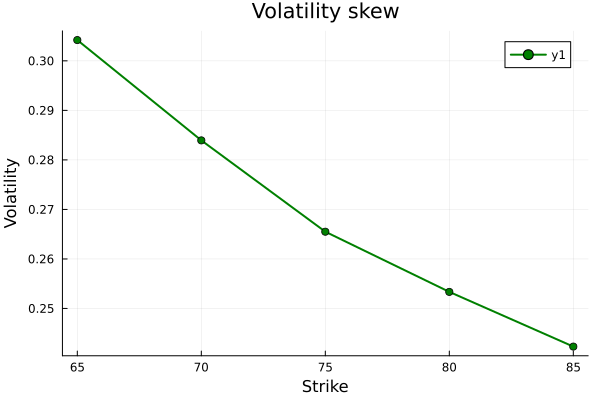

In [ ]:
using Plots

plot(strikes, iv_results,
        marker = :circle,
        linewidth = 2,
        color = "green",
        xlab = "Strike",
        ylab = "Implied Volatility",
        title = "Co2 market Volatility skew")



In [71]:
# say from this i would say a IV of 36 is reasonable, the fair value would be
sigma_55 = 0.36
K_55 = 55

println("The fair value of the option would be")
fair_price = Put_B76(sigma_55, F0, K_55, T, r)
println(fair_price)

#Adding our spread
println("Adding our premium")
spread = 0.05
quoted_price = fair_price * (1+ spread)
println(quoted_price)


The fair value of the option would be
0.8560666504073564
Adding our premium
0.8988699829277242
